In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [2]:
! kaggle datasets download -d pcbreviglieri/pneumonia-xray-images

 99% 1.13G/1.14G [00:18<00:00, 104MB/s]
100% 1.14G/1.14G [00:18<00:00, 67.7MB/s]


In [3]:
import zipfile
zf = "/content/pneumonia-xray-images.zip"
target_dir = "/content/dataset/cnn/pneumonia_revamped"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [4]:
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
##Define Directories for train, test & Validation Set
train_path = '/content/dataset/cnn/pneumonia_revamped/train'
test_path = '/content/dataset/cnn/pneumonia_revamped/test'
valid_path = '/content/dataset/cnn/pneumonia_revamped/val'

batch_size = 16
img_height = 64
img_width = 64

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [6]:
#Loading the images
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False,

      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )


Found 4192 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


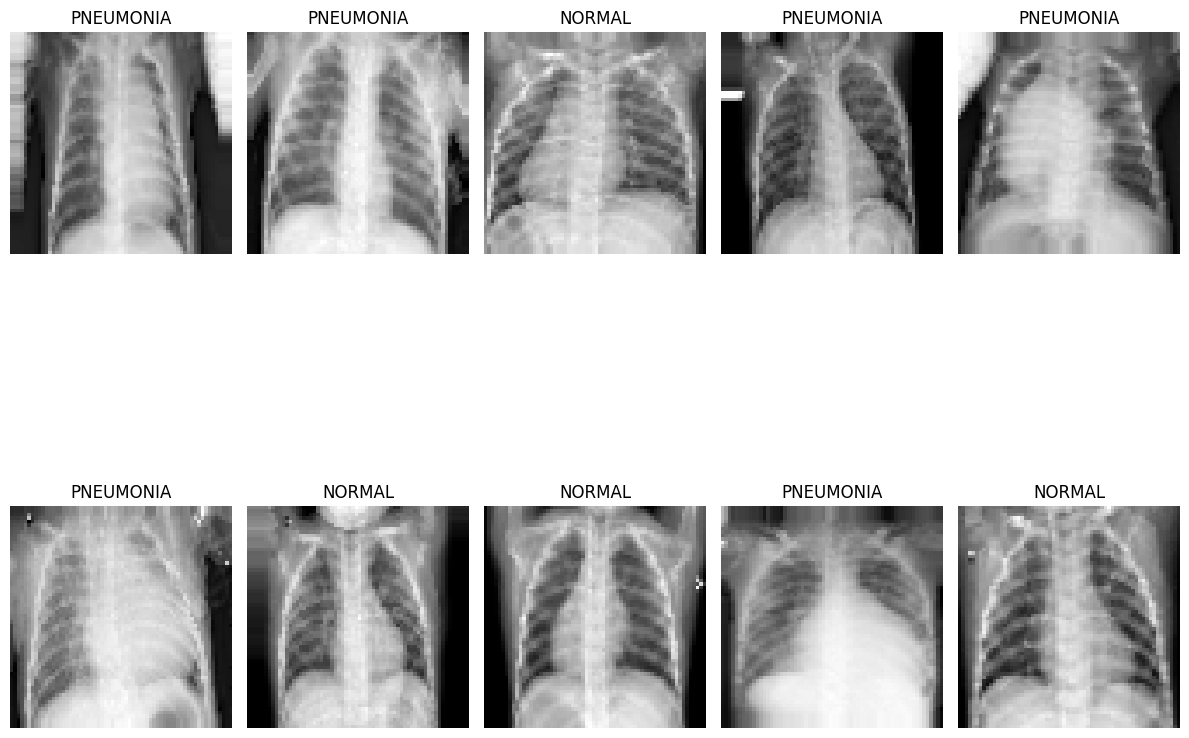

In [7]:
#sets obtained from data augmentation
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [9]:


cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1)) #activation function as softmax for the last layer If the problem is more than 2 classes
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [11]:
cnn.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [12]:
#interpretting modal summary
Conv2D(
    filters = 32,
    kernel_size=(3*3),
    strides=(1, 1),
    padding="valid", #output size of (64-3+1 , 64-3+1 ) = (62,62)
    activation=None,
    input_shape=(img_height, img_width))

In [13]:
MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid" #((62–2//2)+1,(62–2//2)+1))
    )

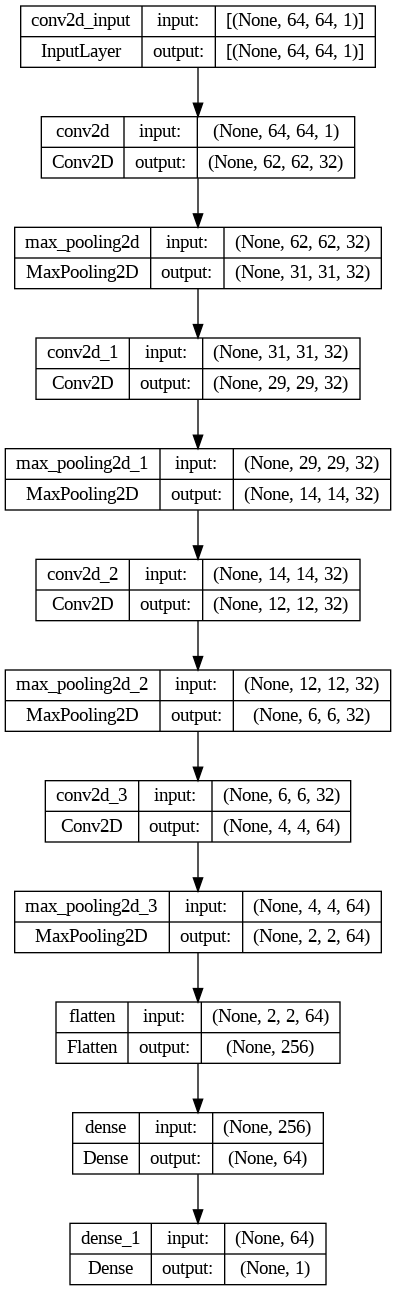

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [16]:
history = cnn.fit(train,epochs=5, validation_data=valid)

Epoch 1/5
262/262 [==============================] - 61s 223ms/step - loss: 0.4157 - accuracy: 0.8096 - val_loss: 0.2625 - val_accuracy: 0.8875
Epoch 2/5
262/262 [==============================] - 61s 233ms/step - loss: 0.2385 - accuracy: 0.9000 - val_loss: 0.2502 - val_accuracy: 0.8885
Epoch 3/5
262/262 [==============================] - 60s 227ms/step - loss: 0.1993 - accuracy: 0.9194 - val_loss: 0.2136 - val_accuracy: 0.9087
Epoch 4/5
262/262 [==============================] - 60s 230ms/step - loss: 0.1976 - accuracy: 0.9218 - val_loss: 0.1845 - val_accuracy: 0.9327
Epoch 5/5
262/262 [==============================] - 60s 230ms/step - loss: 0.1721 - accuracy: 0.9292 - val_loss: 0.1838 - val_accuracy: 0.9385


In [17]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

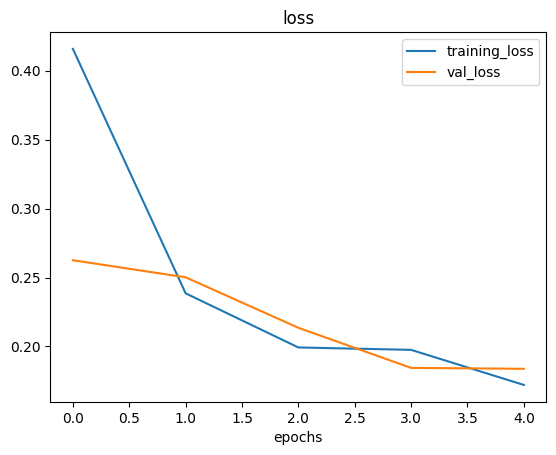

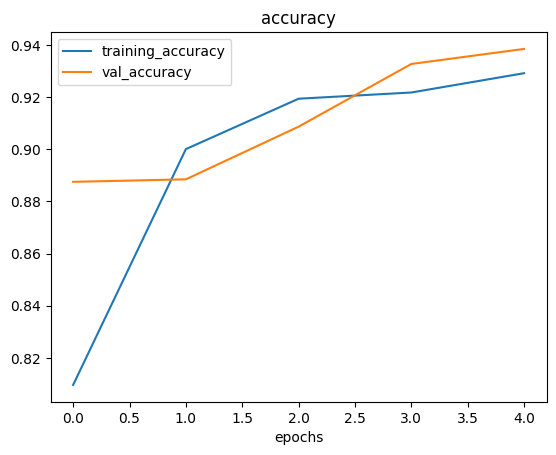

In [18]:
plot_loss_curves(history)

In [19]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

39/39 [==============================] - 4s 95ms/step - loss: 0.4480 - accuracy: 0.8301
The testing accuracy is : 83.01281929016113 %


In [23]:
preds = cnn.predict(test,verbose=1)

39/39 [==============================] - 4s 93ms/step


In [24]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1


<Axes: >

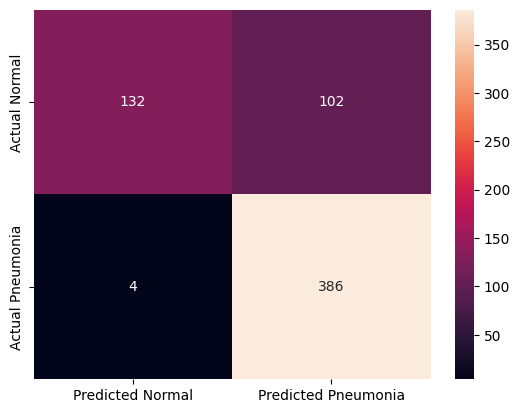

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [26]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.97      0.56      0.71       234
   PNEUMONIA       0.79      0.99      0.88       390

    accuracy                           0.83       624
   macro avg       0.88      0.78      0.80       624
weighted avg       0.86      0.83      0.82       624



(624, 64, 64, 1)
(624,)


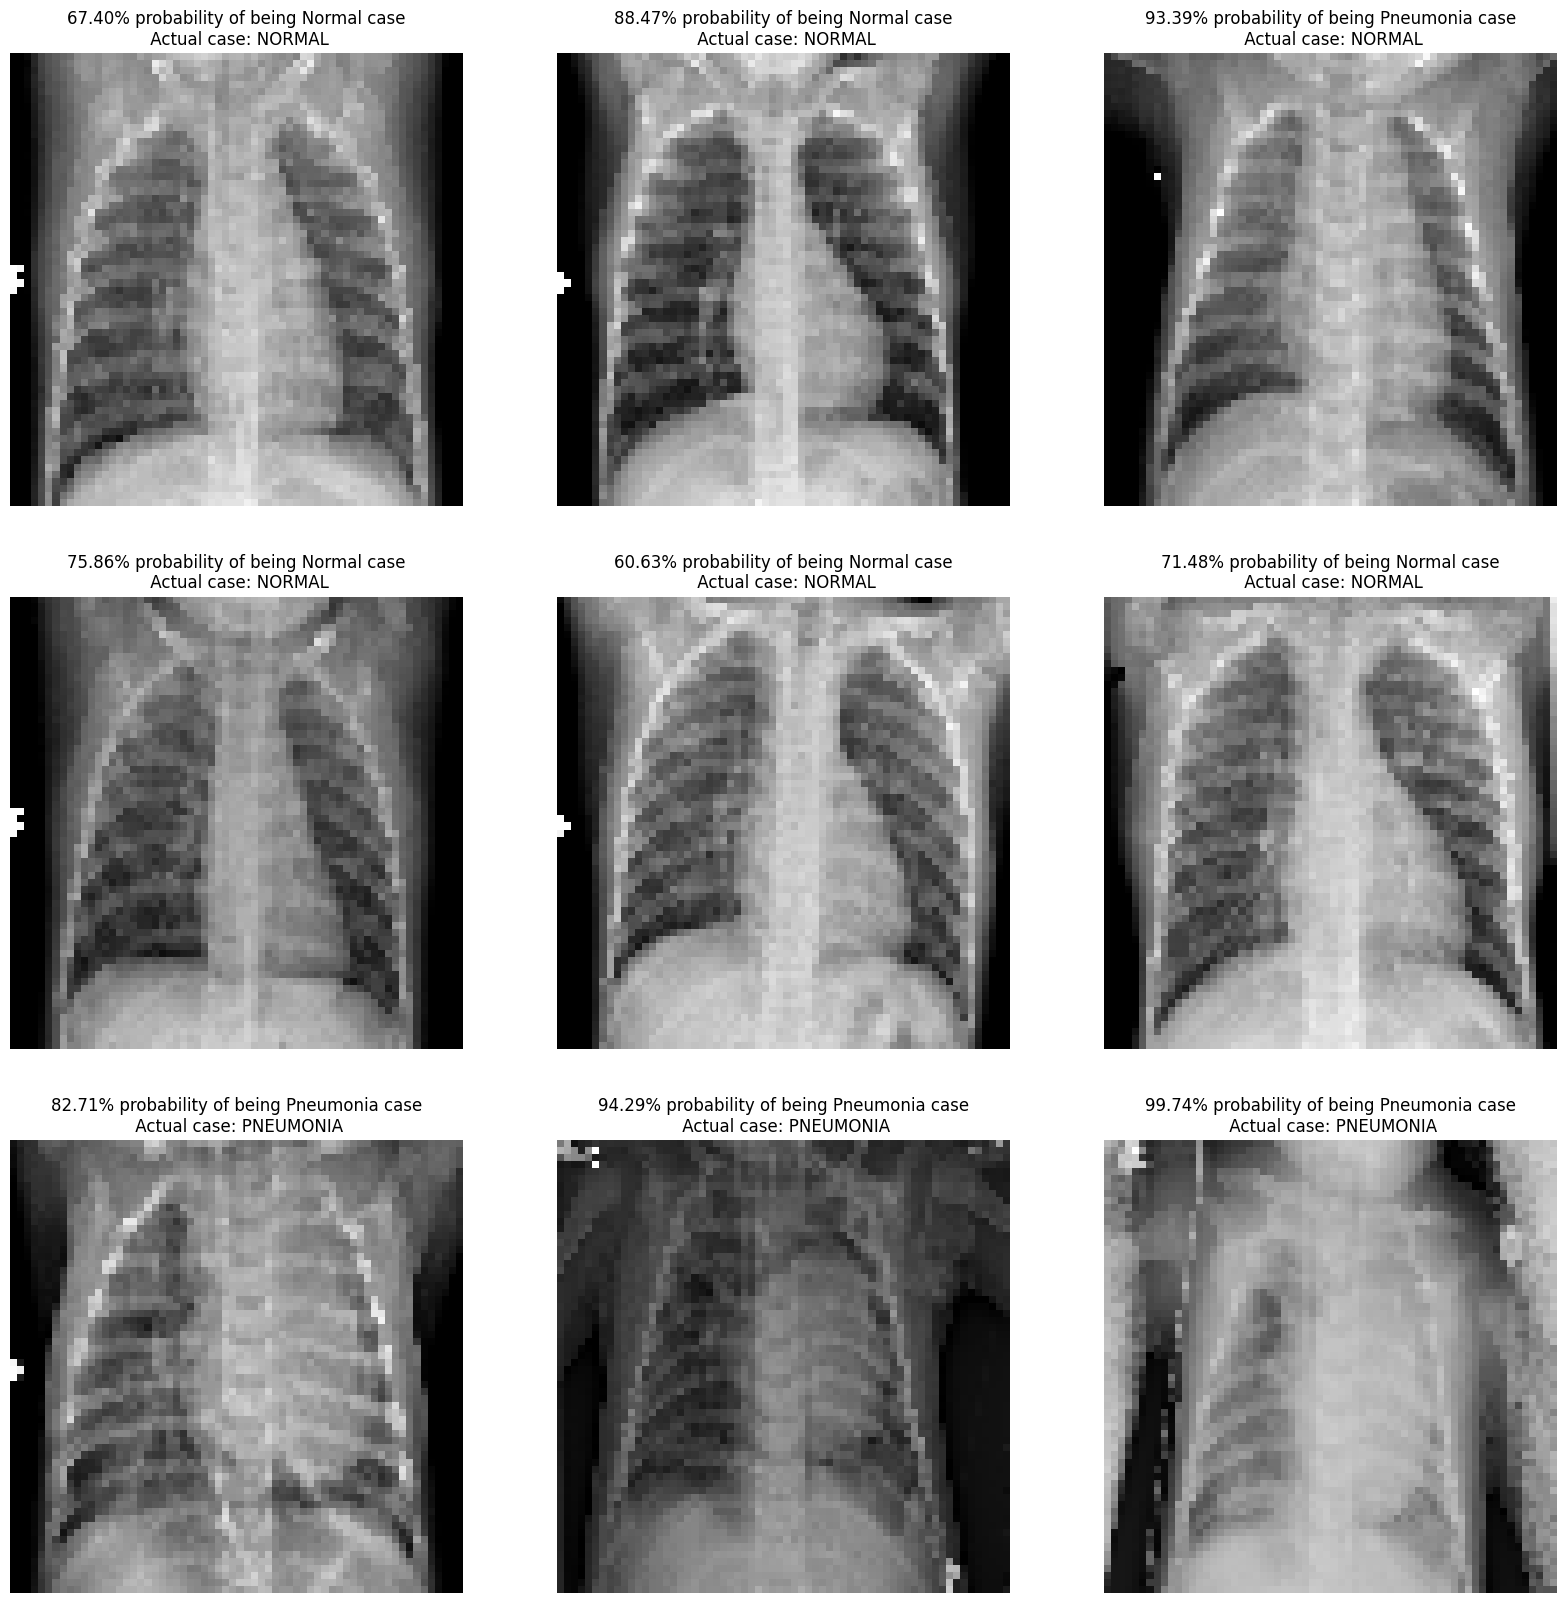

In [30]:
test.reset()
x = np.concatenate([test.next()[0] for _ in range(test.__len__())])
y = np.concatenate([test.next()[1] for _ in range(test.__len__())])
print(x.shape)
print(y.shape)

# This little code above extracts the images from the test Data iterator without shuffling the sequence
# x contains the image array and y has labels
dic = {0: 'NORMAL', 1: 'PNEUMONIA'}
plt.figure(figsize=(20, 20))

for i in range(0 + 228, 9 + 228):
    plt.subplot(3, 3, (i - 228) + 1)

    if preds[i, 0] >= 0.5:
        out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
    else:
        out = ('{:.2%} probability of being Normal case'.format(1 - preds[i][0]))

    plt.title(out + "\n Actual case: " + dic.get(y[i]))
    plt.imshow(np.squeeze(x[i]), cmap='gray')  # Assuming images are grayscale
    plt.axis('off')

plt.show()
